#IPPR EXPT 5

##Experiment No.5

##Region based segmentation

###NAME - SWARNABH GAJBHIYE

###PRN - 1032211392

##AIM:
 To perform region based segmentation of the given image

##Results:
Region Growing Segmentation:

Region growing segmented the image based on similarity criteria from seed points.
It produced coherent regions by iteratively adding neighboring pixels with similar properties to the seed points.
The segmented regions were relatively smooth and coherent, adapting to local variations in intensity or texture.

K-means Clustering Segmentation:

K-means clustering segmented the image into a predetermined number of clusters based on pixel similarity.
It partitioned the image into K clusters by minimizing the within-cluster variance.
The segmented image displayed distinct regions corresponding to different clusters with similar pixel properties.

##Conclusion:
Region Growing:

Region growing is effective for segmenting images where local homogeneity is important.
It is suitable for images with gradual intensity or texture changes and where seed points can be chosen appropriately.
However, region growing may struggle with noise or when the desired regions do not have clear intensity or texture differences.

K-means Clustering:

K-means clustering is useful for segmenting images into a predefined number of clusters based on global pixel similarity.
It works well when the number of clusters is known and when there are clear separations between different regions.
However, K-means clustering may not perform well when regions have overlapping pixel distributions or when the number of clusters is unknown.

Overall:
Both region growing and K-means clustering are effective region-based segmentation techniques, each with its strengths and weaknesses.
The choice between these techniques depends on the characteristics of the image and the desired segmentation outcome. Experimenting with different segmentation techniques and parameters is essential to achieve the best segmentation results for a given image dataset.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [12]:
# Read the image
image = cv2.imread('/content/doug-kelley-rPDuuBEtFI8-unsplash.jpg')

# Reduce image size
image = cv2.resize(image, (0, 0), fx=0.5, fy=0.5)


In [13]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [14]:
# Region Growing
def region_growing(image, seed, threshold):
    visited = np.zeros_like(image)
    region = np.zeros_like(image)
    seed_points = [seed]

    while seed_points:
        current_point = seed_points.pop(0)
        region[current_point[0], current_point[1]] = 255
        for i in range(-1, 2):
            for j in range(-1, 2):
                x = current_point[0] + i
                y = current_point[1] + j
                if 0 <= x < image.shape[0] and 0 <= y < image.shape[1]:
                    if visited[x, y] == 0 and np.abs(int(image[x, y]) - int(image[current_point[0], current_point[1]])) < threshold:
                        seed_points.append([x, y])
                        visited[x, y] = 1
    return region

In [15]:
# K-means Clustering
def k_means_segmentation(image, K, max_iterations):
    Z = image.reshape((-1,1))
    Z = np.float32(Z)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret,label,center=cv2.kmeans(Z,K,None,criteria,max_iterations,cv2.KMEANS_RANDOM_CENTERS)

    center = np.uint8(center)
    res = center[label.flatten()]
    segmented_image = res.reshape((image.shape))

    return segmented_image


In [17]:
# Example usage
seed_point = (50, 50)  # Define seed point for region growing
threshold = 10  # Define threshold for similarity in region growing

num_clusters = 4  # Define number of clusters for k-means clustering
max_iterations = 10  # Define maximum iterations for K-means clustering
kmeans_segmented_image = k_means_segmentation(gray_image, num_clusters, max_iterations)


In [18]:
region_segmented_image = region_growing(gray_image, seed_point, threshold)


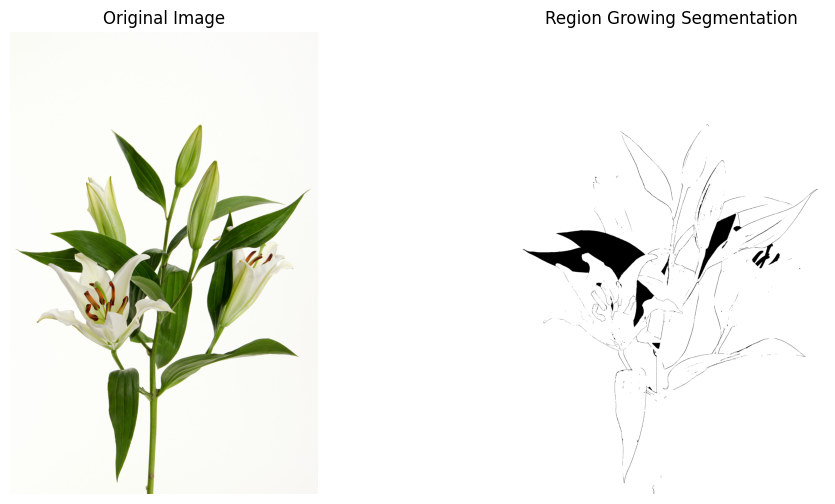

In [21]:
# Display the original and segmented images using Matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(region_segmented_image, cmap='gray')
plt.title('Region Growing Segmentation')
plt.axis('off')

plt.show()

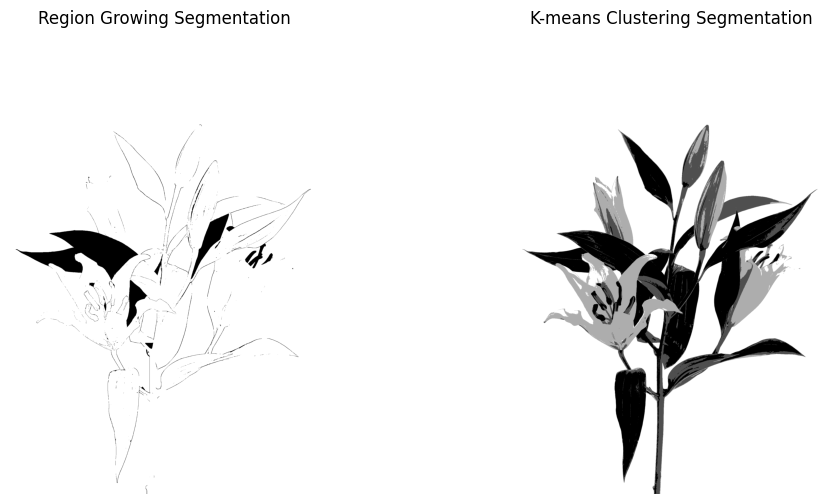

In [19]:
# Display the segmented images using Matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(region_segmented_image, cmap='gray')
plt.title('Region Growing Segmentation')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(kmeans_segmented_image, cmap='gray')
plt.title('K-means Clustering Segmentation')
plt.axis('off')

plt.show()

#POST LAB QUESTION

##Write down the algorithm of the implemented Region based segmentation technique.

### Region Growing Algorithm:

#### Input:
- Original grayscale image \( I \)
- Seed point \( S \) within the image
- Threshold value \( T \) for similarity criteria
- Maximum region size \( M \) to limit the size of the segmented region

#### Initialization:
- Create an empty matrix to store the segmented region \( R \).
- Initialize a list of seed points with the initial seed point \( S \).
- Initialize a matrix to keep track of visited pixels.

#### Region Growing:
- While there are seed points and the size of the region is less than \( M \):
  - Pop the first seed point \( P \) from the list.
  - Add \( P \) to the segmented region \( R \).
  - Mark \( P \) as visited.
  - For each neighboring pixel \( N \) of \( P \):
    - If \( N \) is within the image boundaries:
      - If \( N \) has not been visited and the absolute intensity difference between \( N \) and \( P \) is less than \( T \):
        - Add \( N \) to the list of seed points.
        - Mark \( N \) as visited.
  - Increment the size of the region.

#### Output:
- The segmented region \( R \) containing pixels with similar properties to the seed point.
